# Worksheet 06

Name:  Zheyu Yang
UID: U41174832

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

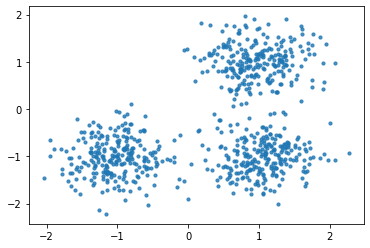

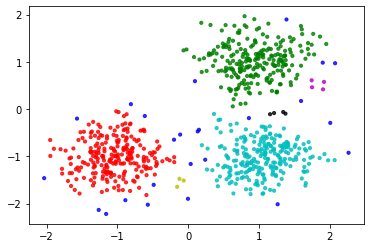

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        # Initialize labels for all data points as unvisited (-1)
        labels = np.full(self.dataset.shape[0], -1)

        # Initialize cluster label
        cluster_label = 0

        # Iterate through all data points
        for i in range(self.dataset.shape[0]):
            # If the data point has already been visited, continue to the next point
            if labels[i] != -1:
                continue

            # Find all the neighboring points within the specified epsilon distance
            neighbors = self.find_neighbors(i)

            # If the number of neighbors is less than the specified minimum number of points, mark the point as noise
            if len(neighbors) < self.min_pts:
                labels[i] = 0  # Label as noise
            else:
                # Expand the cluster
                cluster_label += 1
                self.expand_cluster(i, neighbors, cluster_label, labels)

        return labels

    def find_neighbors(self, i):
        # Find all the neighboring points within the specified epsilon distance of point i
        neighbors = []
        for j in range(self.dataset.shape[0]):
            # If the distance between points i and j is less than epsilon, j is a neighbor of i
            if np.linalg.norm(self.dataset[i] - self.dataset[j]) < self.epsilon:
                neighbors.append(j)
        return neighbors

    def expand_cluster(self, i, neighbors, cluster_label, labels):
        # Assign the current point to the cluster
        labels[i] = cluster_label

        # Process all the neighbors
        for j in neighbors:
            # If the neighbor has not been visited, mark it as visited and find its neighbors
            if labels[j] == -1:
                labels[j] = cluster_label
                new_neighbors = self.find_neighbors(j)
                # If the number of neighbors is greater than or equal to the minimum number of points,
                # add the neighbors to the current list of neighbors
                if len(new_neighbors) >= self.min_pts:
                    neighbors += new_neighbors

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()